# Holiday Package Prediction

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
print('succesful')

succesful


In [4]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
for col in df.select_dtypes(include=['object']):
    print(df[col].value_counts())

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


In [8]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')
print('Replaced')

Replaced


In [9]:
df.Gender.value_counts(), df.MaritalStatus.value_counts()

(Gender
 Male      2916
 Female    1972
 Name: count, dtype: int64,
 MaritalStatus
 Married      2340
 Unmarried    1598
 Divorced      950
 Name: count, dtype: int64)

In [10]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [11]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [12]:
# Filling missing values
df.Age.fillna(df.Age.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)  # Corrected mode
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)  # Corrected mode
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)  # Corrected mode
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)  # Corrected mode
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)
print('replaced')

replaced


In [13]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.shape

(4888, 20)

In [15]:
df.drop('CustomerID', inplace=True, axis=1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering

In [16]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns = ['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True)

In [17]:
num_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(f'Number of Numerical Features : {len(num_features)}')

Number of Numerical Features : 12


In [18]:
cat_features = [feature for feature in df.columns if df[feature].dtype=='O']
print(f'Number of Categorical Features : {len(cat_features)}')

Number of Categorical Features : 6


In [19]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()<25)] 
print(f'Number of Discrete Features : {len(discrete_features)}')

Number of Discrete Features : 12


In [20]:
continous_feature = [feature for feature in num_features if feature not in discrete_features]
print(f'Number of Continous Features : {len(continous_feature)}')

Number of Continous Features : 0


In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
from sklearn.model_selection import train_test_split
x = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)
x_train.shape, x_test.shape

((3274, 17), (1614, 17))

In [24]:
cat_features = x.select_dtypes(include=['object']).columns
num_features = x.select_dtypes(exclude=['object']).columns

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

In [26]:
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [27]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [28]:
x_train = preprocessor.fit_transform(x_train)

In [29]:
x_test = preprocessor.transform(x_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score,confusion_matrix, recall_score, precision_score

In [32]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decsion Tree' : DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Adaboosting' : AdaBoostClassifier()
}

for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Use probabilities for ROC AUC Score
    y_train_proba = model.predict_proba(x_train)[:, 1] # For binary classification
    y_test_proba = model.predict_proba(x_test)[:, 1]    # For binary classification

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train, y_train_pred, average="weighted")
    model_train_recall = recall_score(y_train, y_train_pred, average="weighted")
    model_train_rocauc_score = roc_auc_score(y_train, y_train_proba)

    # Testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test, y_test_pred, average="weighted")
    model_test_recall = recall_score(y_test, y_test_pred, average="weighted")
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba)
    
    
    print('\n'+'='*50+'\n')
    # Print metrics
    print(model_name)
    
    print("\nModel Performance on Training Set")
    print("-" * 50 )
    print(f"Accuracy       => {np.round(model_train_accuracy, 2)}")
    print(f"F1 Score       => {np.round(model_train_f1, 2)}")
    print(f"Precision      => {np.round(model_train_precision, 2)}")
    print(f"Recall         => {np.round(model_train_recall, 2)}")
    print(f"ROC AUC Score  => {np.round(model_train_rocauc_score, 2)}")
    
    print("\nModel Performance on Testing Set")
    print("-" * 50 )
    print(f"Accuracy       => {np.round(model_test_accuracy, 2)}")
    print(f"F1 Score       => {np.round(model_test_f1, 2)}")
    print(f"Precision      => {np.round(model_test_precision, 2)}")
    print(f"Recall         => {np.round(model_test_recall, 2)}")
    print(f"ROC AUC Score  => {np.round(model_test_rocauc_score, 2)}")
    print("\n" + "=" * 50 + "\n")



Logistic Regression

Model Performance on Training Set
--------------------------------------------------
Accuracy       => 0.84
F1 Score       => 0.82
Precision      => 0.83
Recall         => 0.84
ROC AUC Score  => 0.81

Model Performance on Testing Set
--------------------------------------------------
Accuracy       => 0.85
F1 Score       => 0.82
Precision      => 0.83
Recall         => 0.85
ROC AUC Score  => 0.81




Decsion Tree

Model Performance on Training Set
--------------------------------------------------
Accuracy       => 1.0
F1 Score       => 1.0
Precision      => 1.0
Recall         => 1.0
ROC AUC Score  => 1.0

Model Performance on Testing Set
--------------------------------------------------
Accuracy       => 0.89
F1 Score       => 0.89
Precision      => 0.89
Recall         => 0.89
ROC AUC Score  => 0.82




Random Forest

Model Performance on Training Set
--------------------------------------------------
Accuracy       => 1.0
F1 Score       => 1.0
Precision      =

### Hyper-Prameter Tunning

In [38]:
adaboost = AdaBoostClassifier()
grd_boost = GradientBoostingClassifier()

In [35]:
ada_params = {
    'estimator' : [5, 8, None, 10],
    'n_estimators' : [5, 7, 'auto',8],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [36]:
ada_params

{'estimator': [5, 8, None, 10],
 'n_estimators': [5, 7, 'auto', 8],
 'algorithm': ['SAMME', 'SAMME.R']}

In [47]:
randomcv_models = [
    ('Adaboost', AdaBoostClassifier(), ada_params)
]

In [48]:
from sklearn.model_selection import RandomizedSearchCV
model_params = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                cv=3,
                                verbose=2,
                                n_jobs=-1
                               )
    random.fit(x_train,y_train)
    model_params[name] = random.best_params_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [49]:
for model_name in model_params:
    print(f'---------------------Best Params for {model_name}-----------------------')
    print(model_params[model_name])
    

---------------------Best Params for Adaboost-----------------------
{'n_estimators': 8, 'estimator': None, 'algorithm': 'SAMME'}


In [44]:
models={
    'Adaboost Classifier': AdaBoostClassifier(n_estimators=8, estimator=None, algorithm= 'SAMME.R')
}
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Use probabilities for ROC AUC Score
    y_train_proba = model.predict_proba(x_train)[:, 1] # For binary classification
    y_test_proba = model.predict_proba(x_test)[:, 1]    # For binary classification

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train, y_train_pred, average="weighted")
    model_train_recall = recall_score(y_train, y_train_pred, average="weighted")
    model_train_rocauc_score = roc_auc_score(y_train, y_train_proba)

    # Testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test, y_test_pred, average="weighted")
    model_test_recall = recall_score(y_test, y_test_pred, average="weighted")
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba)
    
    
    print('\n'+'='*50+'\n')
    # Print metrics
    print(model_name)
    
    print("\nModel Performance on Training Set")
    print("-" * 50 )
    print(f"Accuracy       => {np.round(model_train_accuracy, 2)}")
    print(f"F1 Score       => {np.round(model_train_f1, 2)}")
    print(f"Precision      => {np.round(model_train_precision, 2)}")
    print(f"Recall         => {np.round(model_train_recall, 2)}")
    print(f"ROC AUC Score  => {np.round(model_train_rocauc_score, 2)}")
    
    print("\nModel Performance on Testing Set")
    print("-" * 50 )
    print(f"Accuracy       => {np.round(model_test_accuracy, 2)}")
    print(f"F1 Score       => {np.round(model_test_f1, 2)}")
    print(f"Precision      => {np.round(model_test_precision, 2)}")
    print(f"Recall         => {np.round(model_test_recall, 2)}")
    print(f"ROC AUC Score  => {np.round(model_test_rocauc_score, 2)}")
    print("\n" + "=" * 50 + "\n")



Adaboost Classifier

Model Performance on Training Set
--------------------------------------------------
Accuracy       => 0.84
F1 Score       => 0.81
Precision      => 0.82
Recall         => 0.84
ROC AUC Score  => 0.8

Model Performance on Testing Set
--------------------------------------------------
Accuracy       => 0.84
F1 Score       => 0.81
Precision      => 0.81
Recall         => 0.84
ROC AUC Score  => 0.77




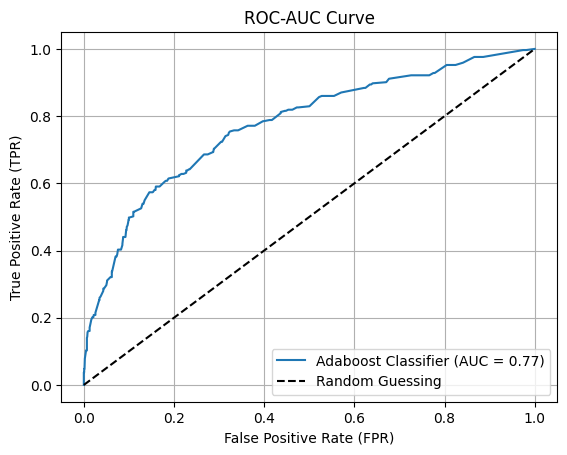

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

auc_models = [
    {
        'label' : 'Adaboost Classifier',
        'model' : AdaBoostClassifier(n_estimators=8, estimator=None, algorithm= 'SAMME.R'),
        'auc' : 0.8
    },
]
for algo in auc_models:
    model = algo['model']
    label = algo['label']

    # Train the model
    model.fit(x_train, y_train)

    # Predict probabilities for ROC Curve
    y_test_proba = model.predict_proba(x_test)[:, 1]  # Probabilities for positive class

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc_score = roc_auc_score(y_test, y_test_proba)
    algo['auc'] = auc_score  # Store the AUC in the dictionary

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Customize the plot
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()